In [1]:
import numpy as np
import matplotlib.pyplot as plt

- This code is an interaction with kalmanfilter.net website.
- What I am trying to do is to simulate the example using python.
- The example link [https://www.kalmanfilter.net/alphabeta.html]

# Alpha-Beta Filter
State Extrapolation Equation 
$$ x_\mathrm{n+1}= x_\mathrm{n} + \Delta{t}\dot{x}_\mathrm{n} $$
$$ \dot{x}_\mathrm{n+1}= \dot{x}_\mathrm{n} $$
State Update Equation for Position
$$ \hat{x}_\mathrm{n,n}= \hat{x}_\mathrm{n,n-1} + \alpha(z_\mathrm{n} - \hat{x}_\mathrm{n,n-1}) $$
State Update Equation for Velocity
$$ \dot{x}_\mathrm{n,n}= \dot{x}_\mathrm{n,n-1} + \beta(\frac{z_\mathrm{n} - \hat{x}_\mathrm{n,n-1}}{\Delta{t}}) $$ 
## TRACKING ACCELERATING AIRCRAFT IN ONE DIMENSION
The radar track-to-track period is
$$ \Delta{t}=5s $$
The Initial Range of the Aircraft is 
$$  \hat{x}_\mathrm{0,0}= 30000m $$
The Initial Aircraft Velocity is 
$$ \dot{x}_\mathrm{0,0}= 50m/s $$

In [2]:
def state_extrapolation_equation(xn,dt,xdotn):
    return (xn + dt*xdotn)
def state_update_equation_for_position(x_predicted,alpha,z_measurment):
    return (x_predicted + (alpha*(z_measurment-x_predicted)))
def state_update_equation_for_velocity(v_predicted,beta,z,x_predicted,dt):
    return (v_predicted+(beta*((z-x_predicted)/dt)))

 The next state estimate position is 30250m

1th iteration
 The current estimate position is 30244.2 m
 The current estimate velocity is 49.42 m/s
 The next state estimate velocity is 49.42m/s
 The next state estimate position is 30491.3m

2th iteration
 The current estimate position is 30483.64 m
 The current estimate velocity is 48.654 m/s
 The next state estimate velocity is 48.654m/s
 The next state estimate position is 30726.91m

3th iteration
 The current estimate position is 30762.728 m
 The current estimate velocity is 52.236 m/s
 The next state estimate velocity is 52.236m/s
 The next state estimate position is 31023.907m

4th iteration
 The current estimate position is 31018.926 m
 The current estimate velocity is 51.738 m/s
 The next state estimate velocity is 51.738m/s
 The next state estimate position is 31277.614m

5th iteration
 The current estimate position is 31295.691 m
 The current estimate velocity is 53.545 m/s
 The next state estimate velocity is 53.545m/s
 The ne

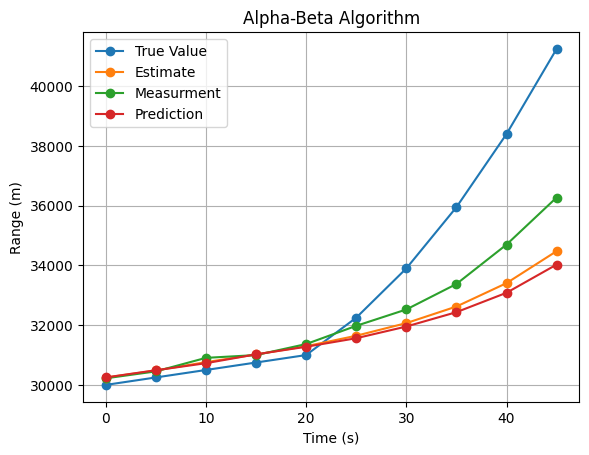

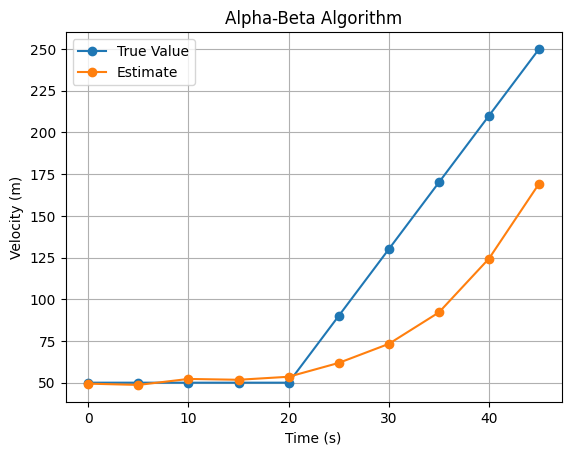

In [64]:
x0 = 30000
dt = 5
v0 = 50
alpha = 0.2
beta = 0.1

z_measurment = [30221,30453,30906,30999,31368,31978,32526,33379,34698,36275]
xn = x0
vn = v0
xp_array = []
vn_array = []
xn_array = []
for i,z in enumerate(z_measurment,1):
    xp = state_extrapolation_equation(xn,dt,vn)
    xp_array.append(xp)
    xn = state_update_equation_for_position(xp,alpha,z)
    xn_array.append(xn)
    vn = state_update_equation_for_velocity(vn,beta,z,xp,dt)
    vn_array.append(vn)
    print(f' The next state estimate position is {round(xp,3)}m\n\n{i}th iteration\n The current estimate position is {round(xn,3)} m\n The current estimate velocity is {round(vn,3)} m/s\n The next state estimate velocity is {round(vn,3)}m/s')

xp = state_extrapolation_equation(xn,dt,vn)
print(f' The next state estimate position is {round(xp,3)}m')
t = np.arange(0,(5*10),5)
v_true = np.zeros(10)
v_true[0:4]=50
v_true[4:10]= 50+ 8*t[0:6]
true_value = 30000 + t*v_true

plt.figure()
plt.plot(t,true_value,marker='o')
plt.plot(t,xn_array,marker='o')
plt.plot(t,z_measurment,marker='o')
plt.plot(t,xp_array,marker='o')
plt.legend(['True Value','Estimate','Measurment','Prediction'])
plt.xlabel('Time (s)')
plt.ylabel('Range (m)')
plt.title('Alpha-Beta Algorithm')
plt.grid()

plt.figure()
plt.plot(t,v_true,marker='o')
plt.plot(t,vn_array,marker='o')
plt.legend(['True Value','Estimate'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m)')
plt.title('Alpha-Beta Algorithm')
plt.grid()